In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
# Importing CSV files - different seeds
dfMarked = pd.read_csv('metricDataFrameMarked.csv')
dfGCR = pd.read_csv('metricDataFrameGCR.csv')

# Importing CSV files - same seed (26)
dfMarked26 = pd.read_csv('metricDataFrameMarked26.csv')
dfGCR26 = pd.read_csv('metricDataFrameGCR26.csv')

In [45]:
dfMarked26 = dfMarked26.drop(['Unnamed: 0'], axis = 1)
dfGCR26 = dfGCR26.drop(['Unnamed: 0'], axis = 1)

In [46]:
#Getting mean values from DataFrames; Dropping first row
dfMarkedMean = dfMarked.mean()
dfMarkedMean = dfMarkedMean.drop(['Unnamed: 0'], axis = 0)

dfMarked26Mean = dfMarked26.mean()

dfGCRMean = dfGCR.mean()
dfGCRMean = dfGCRMean.drop(['Unnamed: 0'], axis = 0)

dfGCR26Mean = dfGCR26.mean()

In [47]:
# Creating DataFrame for comparing Marked and GCR results - different seeds
dfCompare = pd.concat([dfMarkedMean, dfGCRMean], axis = 1)
dfCompare.columns = ['Marked', 'GCR']
# dfCompare

In [48]:
dfMarked26

,Original,Cropped,Scaled,Rotated,Affined,2D Convoluted,Blurred,Noised,GCR / Marked
0,0.225971,0.261874,0.784580,0.634314,0.241142,0.741001,0.742442,0.777291,0.790813
1,0.246829,0.313349,0.771964,0.606648,0.231903,0.779171,0.779950,0.740934,0.777953
2,0.230147,0.198607,0.854011,0.692826,0.235628,0.850445,0.850618,0.830836,0.863043
3,0.229194,0.247070,0.797391,0.614048,0.240521,0.788535,0.790055,0.766378,0.802662
4,0.236505,0.224704,0.752134,0.631386,0.214113,0.737853,0.738919,0.727230,0.763352
...,...,...,...,...,...,...,...,...,...
996,0.279496,0.211973,0.748283,0.619159,0.246126,0.761392,0.761497,0.674887,0.759588
997,0.195921,0.217635,0.868812,0.663777,0.229128,0.871669,0.871804,0.830690,0.875879
998,0.239132,0.239187,0.629797,0.507114,0.255134,0.631687,0.631975,0.613352,0.655651
999,0.200021,0.198172,0.812964,0.644769,0.246512,0.809392,0.810248,0.773500,0.821361


In [49]:
# threshold = dfMarked26['Original'].median()
threshold = 0.3
threshold

0.3

In [50]:
OriginalOverThreshold = len(dfMarked26[dfMarked26['Original'] > threshold])
OriginalUnderThreshold = len(dfMarked26[dfMarked26['Original'] < threshold])

MarkedOverThreshold = len(dfMarked26[dfMarked26['GCR / Marked'] > threshold])
MarkedUnderThreshold = len(dfMarked26[dfMarked26['GCR / Marked'] < threshold])

CroppedOverThreshold = len(dfMarked26[dfMarked26['Cropped'] > threshold])
CroppedUnderThreshold = len(dfMarked26[dfMarked26['Cropped'] < threshold])

ScaledOverThreshold = len(dfMarked26[dfMarked26['Scaled'] > threshold])
ScaledUnderThreshold = len(dfMarked26[dfMarked26['Scaled'] < threshold])

RotatedOverThreshold = len(dfMarked26[dfMarked26['Rotated'] > threshold])
RotatedUnderThreshold = len(dfMarked26[dfMarked26['Rotated'] < threshold])

AffinedOverThreshold = len(dfMarked26[dfMarked26['Affined'] > threshold])
AffinedUnderThreshold = len(dfMarked26[dfMarked26['Affined'] < threshold])

ConvolutedOverThreshold = len(dfMarked26[dfMarked26['2D Convoluted'] > threshold])
ConvolutedUnderThreshold = len(dfMarked26[dfMarked26['2D Convoluted'] < threshold])

BlurredOverThreshold = len(dfMarked26[dfMarked26['Blurred'] > threshold])
BlurredUnderThreshold = len(dfMarked26[dfMarked26['Blurred'] < threshold])

NoisedOverThreshold = len(dfMarked26[dfMarked26['Noised'] > threshold])
NoisedUnderThreshold = len(dfMarked26[dfMarked26['Noised'] < threshold])

In [51]:
OriginalRecall = OriginalOverThreshold / (OriginalUnderThreshold + OriginalOverThreshold)

In [52]:
MarkedRecall = MarkedOverThreshold / (MarkedUnderThreshold + MarkedOverThreshold)

In [53]:
CroppedRecall = CroppedOverThreshold / (CroppedUnderThreshold + CroppedOverThreshold)

In [54]:
ScaledRecall = ScaledOverThreshold / (ScaledUnderThreshold + ScaledOverThreshold)

In [55]:
RotatedRecall = RotatedOverThreshold / (RotatedUnderThreshold + RotatedOverThreshold)

In [56]:
AffinedRecall = AffinedOverThreshold / (AffinedUnderThreshold + AffinedOverThreshold)

In [57]:
ConvolutedRecall = ConvolutedOverThreshold / (ConvolutedUnderThreshold + ConvolutedOverThreshold)

In [58]:
BlurredRecall = BlurredOverThreshold / (BlurredUnderThreshold + BlurredOverThreshold)

In [59]:
NoisedRecall = NoisedOverThreshold / (NoisedUnderThreshold + NoisedOverThreshold)

In [60]:
dfThreshold = pd.DataFrame({'Original':[OriginalRecall],
                            'Marked':[MarkedRecall],
                            'Cropped':[CroppedRecall],
                            'Scaled':[ScaledRecall],
                            'Rotated':[RotatedRecall],
                            'Affined':[AffinedRecall],
                            'Convoluted':[ConvolutedRecall],
                            'Blurred':[BlurredRecall],
                            'Noised':[NoisedRecall]})

In [61]:
dfThresholdTransposed = dfThreshold.transpose()
dfThresholdTransposed.columns = [f"Recall {round(threshold,2)}"]

In [62]:
dfThresholdTransposed

,Recall 0.3
Original,0.018981
Marked,0.997003
Cropped,0.011988
Scaled,0.996004
Rotated,0.996004
Affined,0.000999
Convoluted,0.997003
Blurred,0.997003
Noised,0.989011


In [117]:
rangeThreshold = range(0, 10)

resultsOver = np.zeros([1, len(rangeThreshold)])
resultsUnder = np.zeros([1, len(rangeThreshold)])

counter = 0

for i in rangeThreshold:
    OriginalOverThreshold = len(dfMarked26[dfMarked26['Original'] > (i / 10)])
    OriginalUnderThreshold = len(dfMarked26[dfMarked26['Original'] < (i / 10)])
    
    print(OriginalOverThreshold, OriginalUnderThreshold, i, counter)
    
    resultsOver[0, counter] = OriginalOverThreshold / (OriginalOverThreshold + OriginalUnderThreshold)
    resultsUnder[0, counter] = OriginalUnderThreshold / (OriginalOverThreshold + OriginalUnderThreshold)
    
    counter += 1
    
    dfOver = pd.DataFrame(resultsOver)
    dfUnder = pd.DataFrame(resultsUnder)

1001 0 0 0
1001 0 1 1
965 36 2 2
19 982 3 3
0 1001 4 4
0 1001 5 5
0 1001 6 6
0 1001 7 7
0 1001 8 8
0 1001 9 9


In [118]:
dfOver

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,0.964036,0.018981,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
dfUnder

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.035964,0.981019,1.0,1.0,1.0,1.0,1.0,1.0


In [121]:
dfOverUnder = pd.concat([dfOver, dfUnder])
dfOverUnder

,0,1,2,3,4,5,6,7,8,9
0,1.0,1.0,0.964036,0.018981,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.035964,0.981019,1.0,1.0,1.0,1.0,1.0,1.0


In [63]:
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [74]:
def plot_roc_curve(TP, FP):
    plt.plot(TP, FP, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('Threshold')
    plt.ylabel('Recall')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [75]:
TP = OriginalOverThreshold / (OriginalOverThreshold + OriginalUnderThreshold)
TP

0.01898101898101898

In [76]:
FP = OriginalUnderThreshold / (OriginalOverThreshold + OriginalUnderThreshold)
FP

0.981018981018981

In [77]:
threshold

0.3

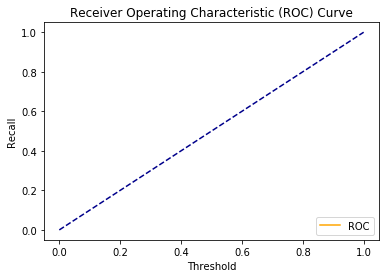

In [87]:
plot_roc_curve(TP, FP)